# 使用fashion_mnist数据集训练分类神经网络

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.4.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 1s 0us/step


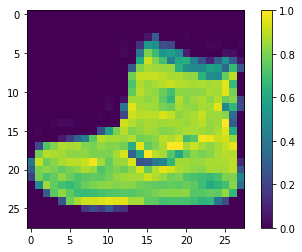

In [4]:
# 展示第一张图片
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

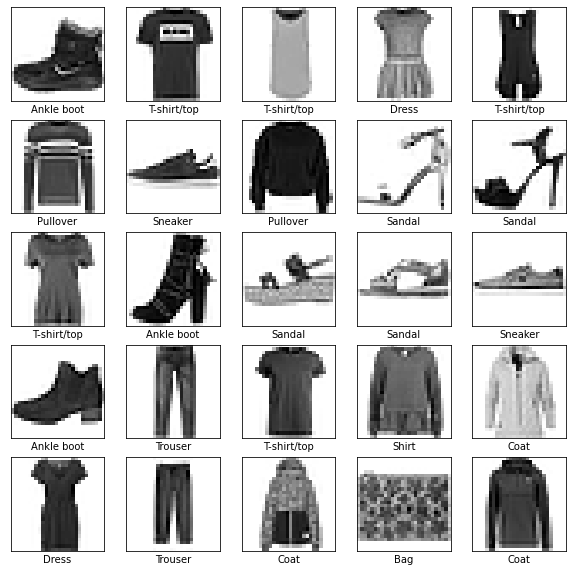

In [5]:
# 展示前25张图片的灰度图
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
# 模型分层
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [7]:
# 编译模型
'''
损失函数 - 用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。
优化器 - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
指标 - 用于监控训练和测试步骤。以下示例使用了准确率，即被正确分类的图像的比率。
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# 训练模型
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 710us/step - loss: 0.6326 - accuracy: 0.7849
Epoch 2/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.3964 - accuracy: 0.8577
Epoch 3/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.3435 - accuracy: 0.8733
Epoch 4/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.3165 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 1s 649us/step - loss: 0.2936 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.2813 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.2694 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.2606 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2470 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 1s 640u

In [9]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3258 - accuracy: 0.8825

Test accuracy: 0.8824999928474426


In [10]:
# 进行预测
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [11]:
# 将其绘制成图表，看看模型对于全部 10 个类的预测
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

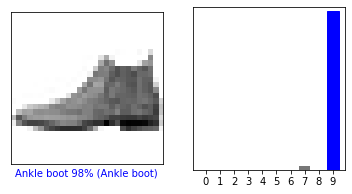

In [12]:
# 验证指定测试数据
# 分类正确显示蓝色
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

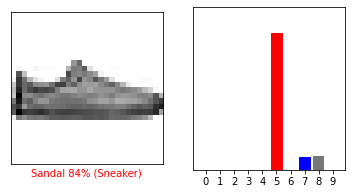

In [13]:
# 验证指定测试数据
# 分类错误显示红色
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

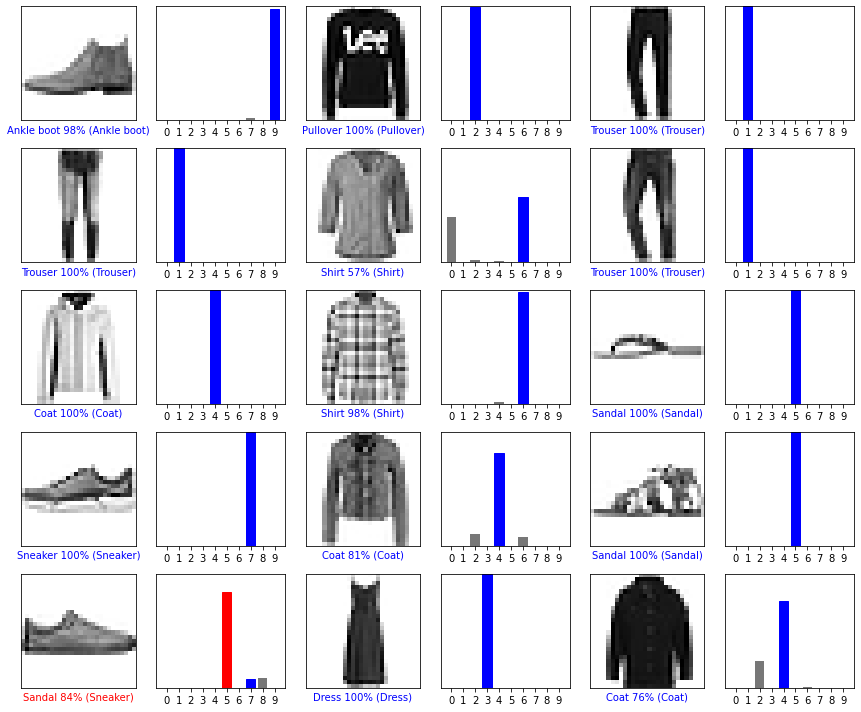

In [14]:
# 用模型的预测绘制几张图像
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [15]:
# 使用训练好的模型对单个图像进行预测
# tf.keras 模型经过了优化，可同时对一个批或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中
img = test_images[1]
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [16]:
predictions_single = probability_model.predict(img)
predictions_single

array([[1.2464754e-04, 4.9943240e-12, 9.9758184e-01, 1.2468574e-11,
        1.5568868e-03, 2.2058002e-13, 7.3661027e-04, 3.1141050e-15,
        2.4521976e-09, 1.5340778e-09]], dtype=float32)

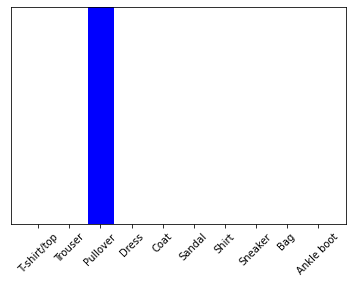

In [17]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [18]:
np.argmax(predictions_single[0])

2